In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [ ]:
# If you wish to use Google colab, the following code will allow you to mount your Google Drive. Otherwise, comment on the following lines.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Reading the data from google drive
heart_disease_data=pd.read_csv('gdrive/My Drive/HeartDiseaseDataset.csv')
#Print that data imported successfully
print("Data imported successfully")

Data imported successfully


In [ ]:
#Data Pre Processing
heart_disease_data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']
# converting features to categorical features

heart_disease_data['chest_pain_type'][heart_disease_data['chest_pain_type'] == 1] = 'typical angina'
heart_disease_data['chest_pain_type'][heart_disease_data['chest_pain_type'] == 2] = 'atypical angina'
heart_disease_data['chest_pain_type'][heart_disease_data['chest_pain_type'] == 3] = 'non-anginal pain'
heart_disease_data['chest_pain_type'][heart_disease_data['chest_pain_type'] == 4] = 'asymptomatic'



heart_disease_data['rest_ecg'][heart_disease_data['rest_ecg'] == 0] = 'normal'
heart_disease_data['rest_ecg'][heart_disease_data['rest_ecg'] == 1] = 'ST-T wave abnormality'
heart_disease_data['rest_ecg'][heart_disease_data['rest_ecg'] == 2] = 'left ventricular hypertrophy'


heart_disease_data['st_slope'][heart_disease_data['st_slope'] == 0] = 'normal'
heart_disease_data['st_slope'][heart_disease_data['st_slope'] == 1] = 'upsloping'
heart_disease_data['st_slope'][heart_disease_data['st_slope'] == 2] = 'flat'
heart_disease_data['st_slope'][heart_disease_data['st_slope'] == 3] = 'downsloping'

heart_disease_data["sex"] = heart_disease_data.sex.apply(lambda  x:'male' if x==1 else 'female')

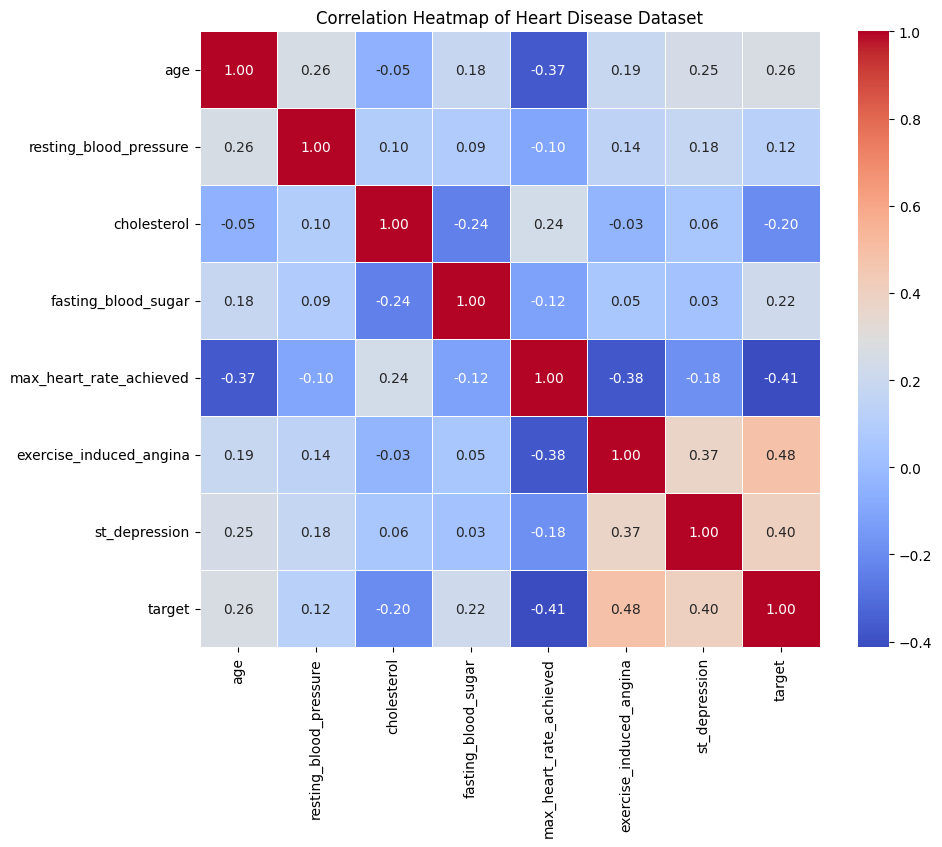

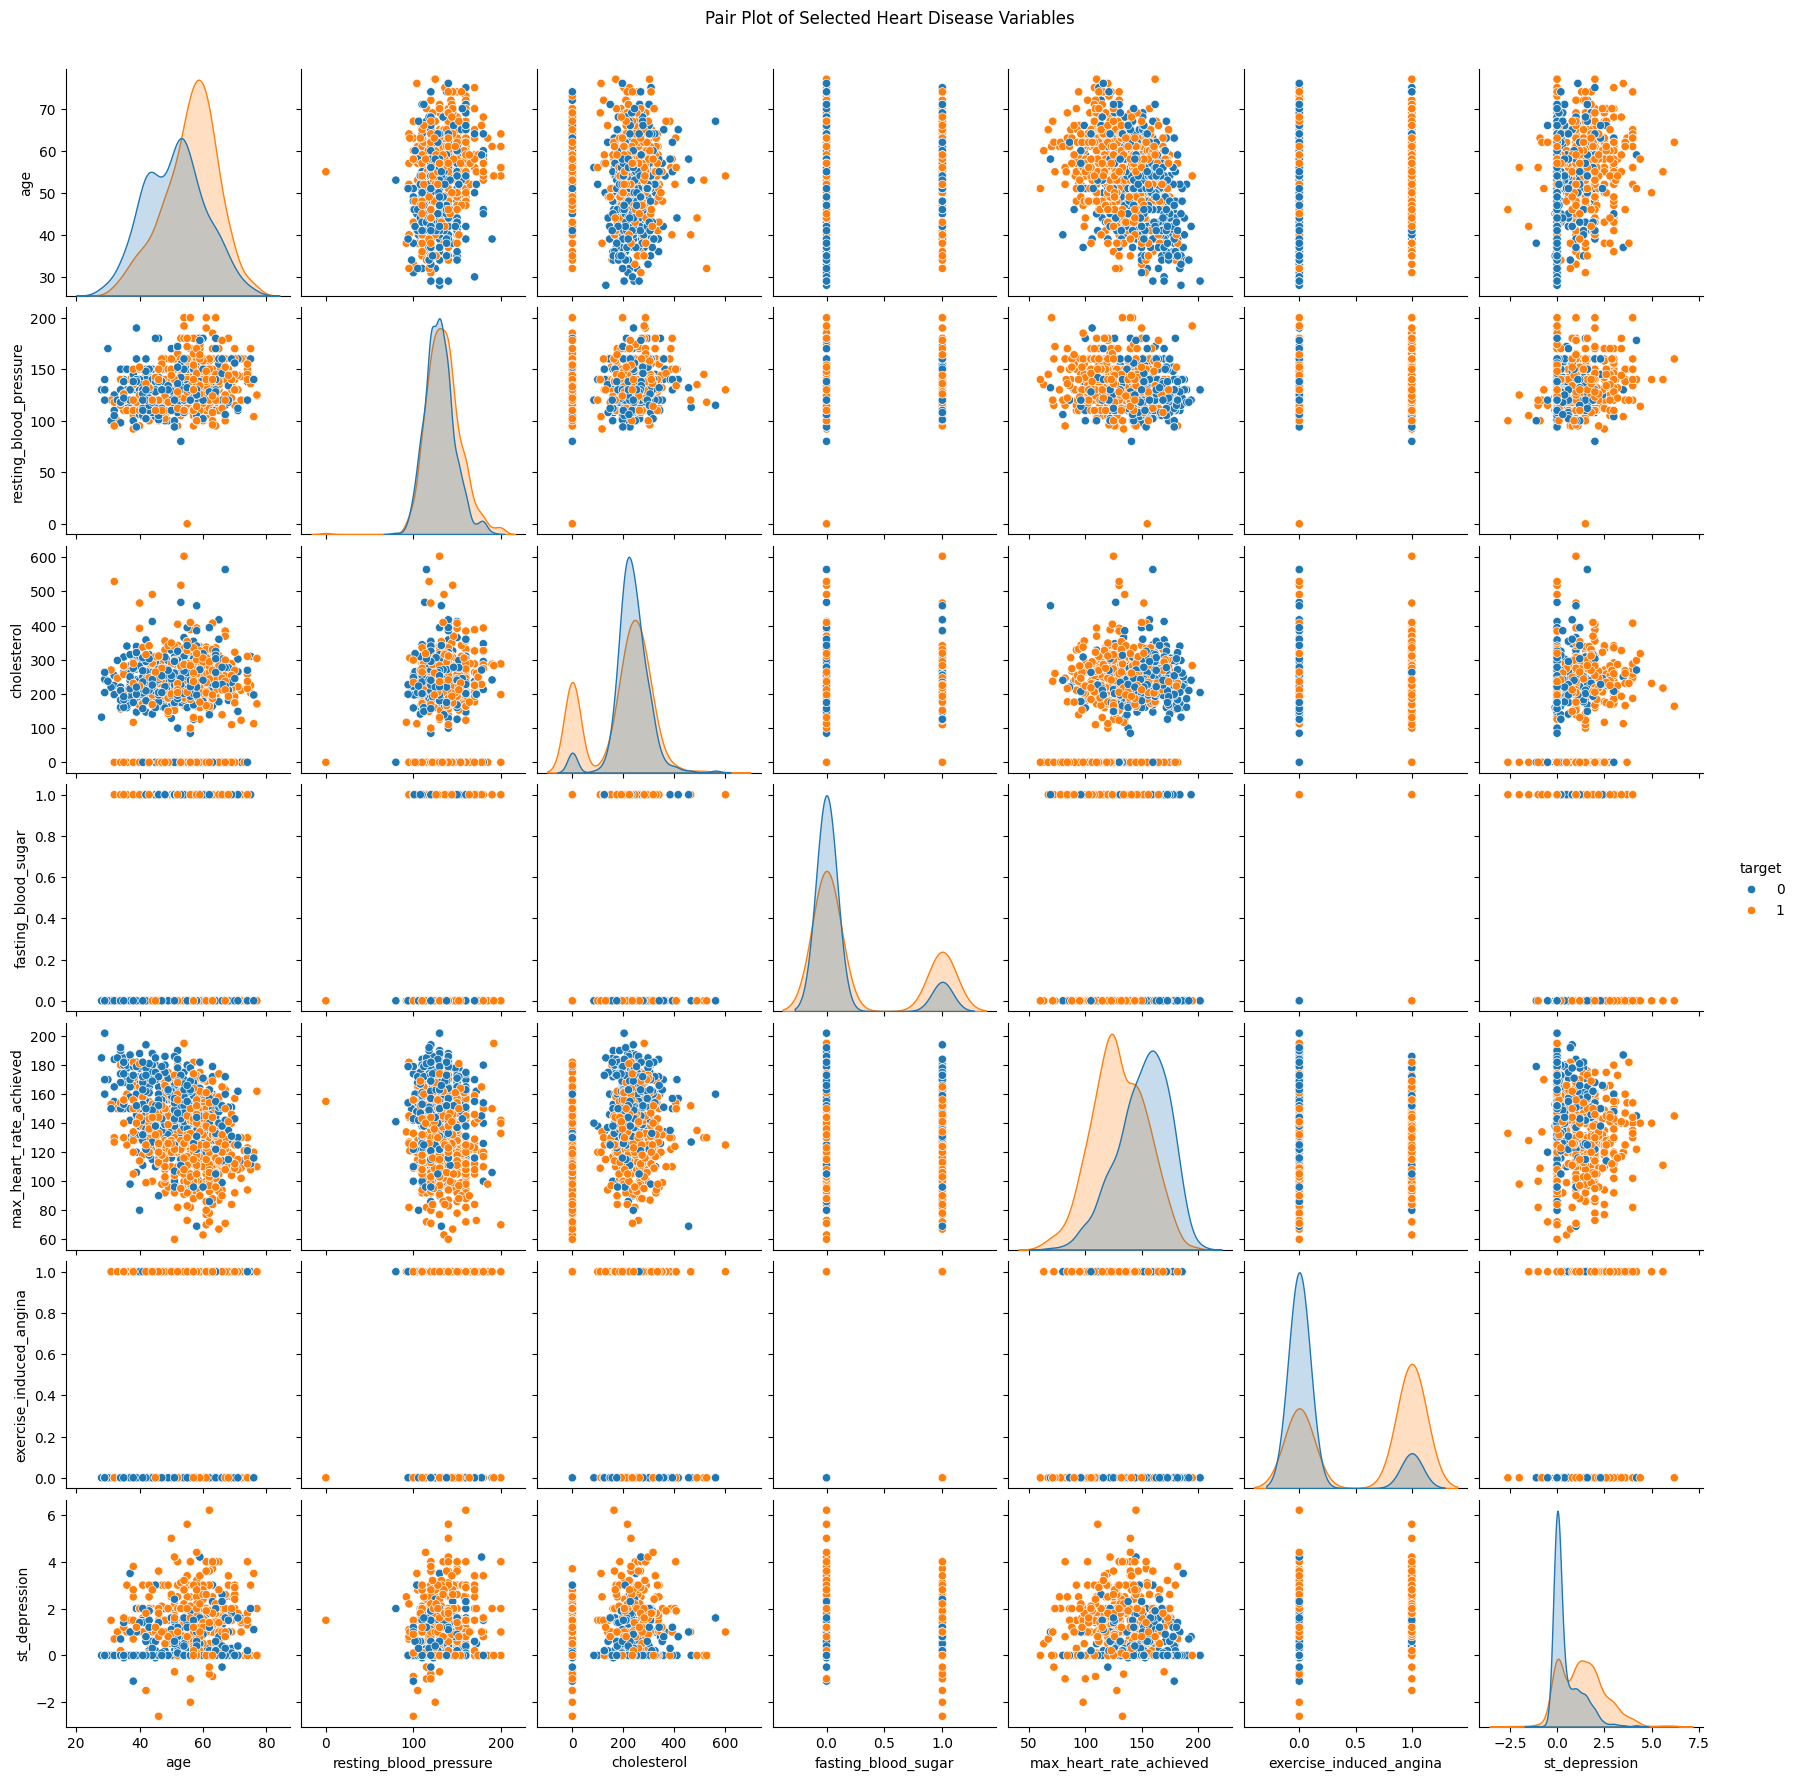

In [ ]:
# Visualization of the datset
# Calculate the correlation matrix
correlation_matrix = heart_disease_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()
#pair plot
subset_df = heart_disease_data[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']]

# Plot the pair plot
sns.pairplot(subset_df, hue='target', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Heart Disease Variables', y=1.02)  # Adjust title position
plt.show()




#The pair plot visualizes the intricate relationships between various health metrics and their potential link to heart disease. Notably, the diagonal density plots reveal that certain factors, such as 'max_heart_rate_achieved' and 'ST_depression', display distinct distribution patterns when comparing individuals with and without heart disease. This distinction suggests that these variables might be key indicators for predicting cardiovascular issues. Additionally, scatter plots within the matrix indicate potential correlations, such as a noticeable inverse relationship between 'age' and 'max_heart_rate_achieved', with younger individuals typically reaching higher maximum heart rates during exercise.

#Moreover, the pair plot offers insight into the class differentiation within the data. The color-coded points enable us to discern potential separations; for example, when 'age' and 'max_heart_rate_achieved' are considered together, there's a visual demarcation between those with and without heart disease. This separation is promising for the development of a predictive model. The presence of outliers in certain variables like 'resting_blood_pressure' and 'cholesterol' also stands out, which warrants further investigation to determine whether they represent anomalies or true extremes. The density of data points in specific ranges for these health indicators also suggests commonality in physiological patterns among the studied population. These visual insights lay the groundwork for a deeper statistical analysis and guide the subsequent steps in predictive modeling.







In [ ]:
print (heart_disease_data.head(10))
heart_disease_data.describe()


   age     sex   chest_pain_type  resting_blood_pressure  cholesterol  \
0   40    male   atypical angina                     140          289   
1   49  female  non-anginal pain                     160          180   
2   37    male   atypical angina                     130          283   
3   48  female      asymptomatic                     138          214   
4   54    male  non-anginal pain                     150          195   
5   39    male  non-anginal pain                     120          339   
6   45  female   atypical angina                     130          237   
7   54    male   atypical angina                     110          208   
8   37    male      asymptomatic                     140          207   
9   48  female   atypical angina                     120          284   

   fasting_blood_sugar               rest_ecg  max_heart_rate_achieved  \
0                    0                 normal                      172   
1                    0                 normal   

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571
std,9.358203,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [ ]:
## Checking missing entries in the dataset columnwise
heart_disease_data.isna().sum()


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

No missing entries in the dataset

In [ ]:
# summary statistics of numerical columns
heart_disease_data.describe(include =[np.number])



,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571
std,9.358203,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


As we can see cholestrol could have outlier because it's minimum value is 0 and maximum is 603.

In [ ]:
#filtering outliers
dt_numeric = heart_disease_data[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]
dt_numeric.head()
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)
#filtering outliers retaining only those data points which are below threshhold
heart_disease_data = heart_disease_data[(z < 3).all(axis=1)]
# checking shape of dataset after outlier removal
print(heart_disease_data.shape)


## encoding categorical variables
heart_disease_data = pd.get_dummies(heart_disease_data, drop_first=True)

print(heart_disease_data.head())



           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.466728                0.427328     0.775674                 1.265039
1     0.504600                1.516587     0.299512                 0.637758
2     1.787437                0.117301     0.716489                 1.636136
3     0.611503                0.318402     0.035867                 1.244085
4     0.029915                0.971958     0.151550                 0.695214
...        ...                     ...          ...                      ...
1185  0.932213                1.206560     0.529071                 0.303164
1186  1.526558                0.645180     0.171279                 0.049682
1187  0.350624                0.117301     0.782852                 0.969650
1188  0.350624                0.117301     0.252877                 1.343449
1189  1.680534                0.318402     0.348832                 1.304244

[1190 rows x 4 columns]
(1173, 12)
   age  resting_blood_pressure  choleste

In [ ]:
# Assuming 'target' is the column you want to predict
X = heart_disease_data.drop('target', axis=1)
y = heart_disease_data['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Further split the training set into a smaller training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the sizes of the training, validation, and test sets to confirm the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 659 samples
Validation set size: 220 samples
Test set size: 294 samples


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Three Baseline Classifiers implemented below:
# Initialize the Logistic Regression model
!pip install memory_profiler
%load_ext memory_profiler
# Logistic Regression
log_reg = LogisticRegression()
%memit log_reg.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
%timeit -r1 log_reg.predict(X_val)
y_val_pred_log_reg = log_reg.predict(X_val)
accuracy1 = accuracy_score(y_val, y_val_pred_log_reg)
precision1 = precision_score(y_val, y_val_pred_log_reg)
recall1 = recall_score(y_val, y_val_pred_log_reg)
f1_1 = f1_score(y_val, y_val_pred_log_reg)
conf_matrix = confusion_matrix(y_val,y_val_pred_log_reg)

print("Logistic Regression Validation Metrics:")
print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print(f"F1 Score: {f1_1:.4f}\n")
print("Confusion Matrix")
print(conf_matrix)


# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_depth=5)
%memit dt_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
%timeit -r1 dt_clf.predict(X_val)
y_val_pred_dt = dt_clf.predict(X_val)
accuracy3 = accuracy_score(y_val, y_val_pred_dt)
precision3 = precision_score(y_val, y_val_pred_dt)
recall3 = recall_score(y_val, y_val_pred_dt)
f1_3 = f1_score(y_val, y_val_pred_dt)
conf_matrix_1 = confusion_matrix(y_val,y_val_pred_dt)

print("Decision Tree Validation Metrics:")
print(f"Accuracy: {accuracy3:.4f}")
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")
print(f"F1 Score: {f1_3:.4f}\n")
print("Confusion Matrix")
print(conf_matrix_1)


# K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
%memit  knn_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
%timeit -r1 knn_clf.predict(X_val)
y_val_pred_knn = knn_clf.predict(X_val)
accuracy4 = accuracy_score(y_val, y_val_pred_knn)
precision4 = precision_score(y_val, y_val_pred_knn)
recall4 = recall_score(y_val, y_val_pred_knn)
f1_4 = f1_score(y_val, y_val_pred_knn)
conf_matrix_2 = confusion_matrix(y_val,y_val_pred_knn)



print("K-Nearest Neighbors Validation Metrics:")
print(f"Accuracy: {accuracy4:.4f}")
print(f"Precision: {precision4:.4f}")
print(f"Recall: {recall4:.4f}")
print(f"F1 Score: {f1_4:.4f}\n")
print("Confusion Matrix")
print(conf_matrix_2)


peak memory: 298.25 MiB, increment: 0.98 MiB
849 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
Logistic Regression Validation Metrics:
Accuracy: 0.4864
Precision: 1.0000
Recall: 0.1102
F1 Score: 0.1986

Confusion Matrix
[[ 93   0]
 [113  14]]
peak memory: 275.22 MiB, increment: 0.37 MiB
805 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
Decision Tree Validation Metrics:
Accuracy: 0.5182
Precision: 0.7234
Recall: 0.2677
F1 Score: 0.3908

Confusion Matrix
[[80 13]
 [93 34]]
peak memory: 275.50 MiB, increment: 0.19 MiB
11.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
K-Nearest Neighbors Validation Metrics:
Accuracy: 0.5227
Precision: 0.8235
Recall: 0.2205
F1 Score: 0.3478

Confusion Matrix
[[87  6]
 [99 28]]


In [ ]:
#Milestone 2- Advanced Models
# Advanced Models Random Forest and GBM
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
%memit rf_clf.fit(X_train, y_train)
%timeit rf_clf.predict(X_val)
y_val_pred_rf = rf_clf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf)
recall_rf = recall_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)
conf_matrix_rf = confusion_matrix(y_val, y_val_pred_rf)


print("Random Forest Validation Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}\n")
print("Confusion Matrix:\n", conf_matrix_rf, "\n")


# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
%memit gb_clf.fit(X_train, y_train)
%timeit gb_clf.predict(X_val)
y_val_pred_gb = gb_clf.predict(X_val)
accuracy_gb = accuracy_score(y_val, y_val_pred_gb)
precision_gb = precision_score(y_val, y_val_pred_gb)
recall_gb = recall_score(y_val, y_val_pred_gb)
f1_gb = f1_score(y_val, y_val_pred_gb)
conf_matrix_gb = confusion_matrix(y_val, y_val_pred_gb)


print("Gradient Boosting Validation Metrics:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}\n")
print("Confusion Matrix:\n", conf_matrix_gb, "\n")



peak memory: 276.19 MiB, increment: 0.04 MiB
13 ms ± 1.66 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Random Forest Validation Metrics:
Accuracy: 0.7955
Precision: 0.8868
Recall: 0.7402
F1 Score: 0.8069

Confusion Matrix:
 [[81 12]
 [33 94]] 

peak memory: 276.21 MiB, increment: 0.00 MiB
2.18 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Gradient Boosting Validation Metrics:
Accuracy: 0.4591
Precision: 1.0000
Recall: 0.0630
F1 Score: 0.1185

Confusion Matrix:
 [[ 93   0]
 [119   8]] 



In [ ]:
#Milestone 3
#Manual Feature Engineering
# Creating interaction terms
heart_disease_data['age_bp_interaction'] = heart_disease_data['age'] * heart_disease_data['resting_blood_pressure']
heart_disease_data['age_chol_interaction'] = heart_disease_data['age'] * heart_disease_data['cholesterol']
# Dropping all age category columns
age_category_columns = [col for col in heart_disease_data.columns if 'age_category' in col]
heart_disease_data.drop(age_category_columns, axis=1, inplace=True)

#split again
X = heart_disease_data.drop('target', axis=1)
y = heart_disease_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
#Three Baseline Classifiers implemented below:
# Initialize the Logistic Regression model
!pip install memory_profiler
%load_ext memory_profiler
# Logistic Regression
log_reg = LogisticRegression()
%memit log_reg.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
%timeit -r1 log_reg.predict(X_val)
y_val_pred_log_reg = log_reg.predict(X_val)
accuracy1 = accuracy_score(y_val, y_val_pred_log_reg)
precision1 = precision_score(y_val, y_val_pred_log_reg)
recall1 = recall_score(y_val, y_val_pred_log_reg)
f1_1 = f1_score(y_val, y_val_pred_log_reg)
conf_matrix = confusion_matrix(y_val,y_val_pred_log_reg)

print("Logistic Regression Validation Metrics:")
print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print(f"F1 Score: {f1_1:.4f}\n")
print("Confusion Matrix")
print(conf_matrix)


# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_depth=5)
%memit dt_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
%timeit -r1 dt_clf.predict(X_val)
y_val_pred_dt = dt_clf.predict(X_val)
accuracy3 = accuracy_score(y_val, y_val_pred_dt)
precision3 = precision_score(y_val, y_val_pred_dt)
recall3 = recall_score(y_val, y_val_pred_dt)
f1_3 = f1_score(y_val, y_val_pred_dt)
conf_matrix_1 = confusion_matrix(y_val,y_val_pred_dt)

print("Decision Tree Validation Metrics:")
print(f"Accuracy: {accuracy3:.4f}")
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")
print(f"F1 Score: {f1_3:.4f}\n")
print("Confusion Matrix")
print(conf_matrix_1)


# K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
%memit  knn_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
%timeit -r1 knn_clf.predict(X_val)
y_val_pred_knn = knn_clf.predict(X_val)
accuracy4 = accuracy_score(y_val, y_val_pred_knn)
precision4 = precision_score(y_val, y_val_pred_knn)
recall4 = recall_score(y_val, y_val_pred_knn)
f1_4 = f1_score(y_val, y_val_pred_knn)
conf_matrix_2 = confusion_matrix(y_val,y_val_pred_knn)



print("K-Nearest Neighbors Validation Metrics:")
print(f"Accuracy: {accuracy4:.4f}")
print(f"Precision: {precision4:.4f}")
print(f"Recall: {recall4:.4f}")
print(f"F1 Score: {f1_4:.4f}\n")
print("Confusion Matrix")
print(conf_matrix_2)

# Advanced Models  and
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
%memit rf_clf.fit(X_train, y_train)
%timeit rf_clf.predict(X_val)
y_val_pred_rf = rf_clf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf)
recall_rf = recall_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)
conf_matrix_rf = confusion_matrix(y_val, y_val_pred_rf)


print("Random Forest Validation Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}\n")
print("Confusion Matrix:\n", conf_matrix_rf, "\n")


# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
%memit gb_clf.fit(X_train, y_train)
%timeit gb_clf.predict(X_val)
y_val_pred_gb = gb_clf.predict(X_val)
accuracy_gb = accuracy_score(y_val, y_val_pred_gb)
precision_gb = precision_score(y_val, y_val_pred_gb)
recall_gb = recall_score(y_val, y_val_pred_gb)
f1_gb = f1_score(y_val, y_val_pred_gb)
conf_matrix_gb = confusion_matrix(y_val, y_val_pred_gb)


print("Gradient Boosting Validation Metrics:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}\n")
print("Confusion Matrix:\n", conf_matrix_gb, "\n")




The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 276.27 MiB, increment: 0.00 MiB
66.6 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
Logistic Regression Validation Metrics:
Accuracy: 0.8682
Precision: 0.9083
Recall: 0.8583
F1 Score: 0.8826

Confusion Matrix
[[ 82  11]
 [ 18 109]]
peak memory: 276.28 MiB, increment: 0.00 MiB
63.5 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
Decision Tree Validation Metrics:
Accuracy: 0.8500
Precision: 0.9052
Recall: 0.8268
F1 Score: 0.8642

Confusion Matrix
[[ 82  11]
 [ 22 105]]
peak memory: 276.29 MiB, increment: 0.00 MiB
10.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
K-Nearest Neighbors Validation Metrics:
Accuracy: 0.8773
Precision: 0.8788
Recall: 0.9134
F1 Score: 0.8958

Confusion Matrix
[[ 77  16]
 [ 11 116]]
peak memory: 276.32 MiB, increment: 0.00 MiB
6.85 ms ± 852 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Rando

In [ ]:
print(heart_disease_data.head(5))

   age  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   40                     140          289                    0   
1   49                     160          180                    0   
2   37                     130          283                    0   
3   48                     138          214                    0   
4   54                     150          195                    0   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  target  \
0                      172                        0            0.0       0   
1                      156                        0            1.0       1   
2                       98                        0            0.0       0   
3                      108                        1            1.5       1   
4                      122                        0            0.0       0   

   sex_male  chest_pain_type_atypical angina  \
0         1                                1   
1         0               

In [ ]:
#Automatic Feature Engineering using RFE ()
from sklearn.feature_selection import RFE
log_reg = LogisticRegression()
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Use RFE to select the top 10 features
rfe = RFE(estimator=log_reg, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

# Retrain the model with the selected features
X_train_selected = rfe.transform(X_train)
X_val_selected = rfe.transform(X_val)
log_reg.fit(X_train_selected, y_train)

# Evaluate the model on the validation set
y_val_pred = log_reg.predict(X_val_selected)
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

print("Validation Metrics:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")


Selected features: Index(['cholesterol', 'fasting_blood_sugar', 'exercise_induced_angina',
       'st_depression', 'sex_male', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'st_slope_flat', 'age_bp_interaction'],
      dtype='object')
Validation Metrics:
Accuracy: 0.8571
Precision: 0.8537
Recall: 0.8861
F1 Score: 0.8696


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the GridSearchCV object for Gradient Boosting
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='f1')
grid_gb.fit(X_train, y_train)

# Print the best parameters and the corresponding F1 score
print("Best parameters for Gradient Boosting:", grid_gb.best_params_)
print("Best F1 score for Gradient Boosting:", grid_gb.best_score_)

Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Best F1 score for Gradient Boosting: 0.9100052883935102


In [ ]:
#Model based on hyperparameter tuning
from sklearn.metrics import roc_auc_score
# Train and evaluate Gradient Boosting with the best parameters
gb_best = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=200)
%memit gb_best.fit(X_train, y_train)
%timeit -r1 gb_best.predict(X_test)
y_test_pred_gb = gb_best.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
precision_gb = precision_score(y_test, y_test_pred_gb)
recall_gb = recall_score(y_test, y_test_pred_gb)
f1_gb = f1_score(y_test, y_test_pred_gb)
auroc_gb = roc_auc_score(y_test, gb_best.predict_proba(X_test)[:, 1])

print("Gradient Boosting Test Metrics:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print(f"AUROC: {auroc_gb:.4f}")


peak memory: 276.37 MiB, increment: 0.01 MiB
843 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
Gradient Boosting Test Metrics:
Accuracy: 0.9524
Precision: 0.9438
Recall: 0.9767
F1 Score: 0.9600
AUROC: 0.9787


In [ ]:
#Testing all the models on test set
# Logistic Regression
log_reg = LogisticRegression()
%memit log_reg.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
%timeit -r1 log_reg.predict(X_test)
y_test_pred_log_reg = log_reg.predict(X_test)
accuracy1 = accuracy_score(y_test, y_test_pred_log_reg)
precision1 = precision_score(y_test, y_test_pred_log_reg)
recall1 = recall_score(y_test, y_test_pred_log_reg)
f1_1 = f1_score(y_test, y_test_pred_log_reg)
auroc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print("Logistic Regression Validation Metrics:")
print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print(f"F1 Score: {f1_1:.4f}\n")
print("AUROC Curve")
print(auroc_log_reg)



# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_depth=5)
%memit dt_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
%timeit -r1 dt_clf.predict(X_test)
y_test_pred_dt = dt_clf.predict(X_test)
accuracy3 = accuracy_score(y_test, y_test_pred_dt)
precision3 = precision_score(y_test, y_test_pred_dt)
recall3 = recall_score(y_test, y_test_pred_dt)
f1_3 = f1_score(y_test, y_test_pred_dt)
auroc_dt = roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:, 1])
print("Decision Tree Validation Metrics:")
print(f"Accuracy: {accuracy3:.4f}")
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")
print(f"F1 Score: {f1_3:.4f}\n")
print("AUROC score")
print(auroc_dt)




# K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
%memit  knn_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
%timeit -r1 knn_clf.predict(X_test)
y_test_pred_knn = knn_clf.predict(X_test)
accuracy4 = accuracy_score(y_test, y_test_pred_knn)
precision4 = precision_score(y_test, y_test_pred_knn)
recall4 = recall_score(y_test, y_test_pred_knn)
f1_4 = f1_score(y_test, y_test_pred_knn)
auroc_knn = roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:, 1])
print("K-Nearest Neighbors Validation Metrics:")
print(f"Accuracy: {accuracy4:.4f}")
print(f"Precision: {precision4:.4f}")
print(f"Recall: {recall4:.4f}")
print(f"F1 Score: {f1_4:.4f}\n")
print("AUROC score")
print(auroc_knn)

# Random Forest
%memit rf_clf.fit(X_train, y_train)
%timeit rf_clf.predict(X_test)
y_test_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)
auroc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

print("Random Forest Test Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"AUROC: {auroc_rf:.4f}\n")

# Gradient Boosting
%memit gb_clf.fit(X_train, y_train)
%timeit gb_clf.predict(X_test)
y_test_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
precision_gb = precision_score(y_test, y_test_pred_gb)
recall_gb = recall_score(y_test, y_test_pred_gb)
f1_gb = f1_score(y_test, y_test_pred_gb)
auroc_gb = roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:, 1])

print("Gradient Boosting Test Metrics:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print(f"AUROC: {auroc_gb:.4f}\n")


peak memory: 276.49 MiB, increment: 0.00 MiB
88.8 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
Logistic Regression Validation Metrics:
Accuracy: 0.8367
Precision: 0.8370
Recall: 0.8953
F1 Score: 0.8652

AUROC Curve
0.8947769729317575
peak memory: 276.49 MiB, increment: 0.00 MiB
62.2 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
Decision Tree Validation Metrics:
Accuracy: 0.8367
Precision: 0.9079
Recall: 0.8023
F1 Score: 0.8519

AUROC score
0.9029736942432329
peak memory: 276.51 MiB, increment: 0.00 MiB
7.72 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
K-Nearest Neighbors Validation Metrics:
Accuracy: 0.8639
Precision: 0.8750
Recall: 0.8953
F1 Score: 0.8851

AUROC score
0.9319481509721693
peak memory: 276.52 MiB, increment: 0.02 MiB
5.47 ms ± 67.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Random Forest Test Metrics:
Accuracy: 0.9592
Precision: 0.9545
Recall: 0.9767
F1 Score: 0.9655
AUROC: 0.9779

peak memory: 276.52